<a href="https://colab.research.google.com/github/RichBirch1/RichBirch1/blob/main/LoanApplicationApproval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Notebook Details**

This Jupyter Notebook was developed in Google Colab December 2020.
Its purpose is to automate loan application approvals process.

It does this by merging historical data from the ERP database with the Excel files from the loan department to create cleansed a master data set on which a supervised machine learning model can be based.  The model can then be used for future loan application details to predict approval whether they should be rejected or approved.

# 1 - Load the libraries to be used in the notebook 
1.   Tabula will be used to read the data from PDF
2.   Pandas will be used read the data from Excel and write to CSVs, it will also be use for creating data frames and manipluating the data
3.   Matplotlib will be used for standard visualisations
4.   Seaborn will be used for interactive visualisations

In [ ]:
# First, install the tabula-py module which can read in data from tables in PDF files (this is not a standard module in colab currently)

!pip install -q tabula-py

     |████████████████████████████████| 11.7MB 5.5MB/s 


In [ ]:
# Next import the python libraries that will be used in the notebook
# Note: Others are imported later in the workbook, but this covers the main ones

# Import the tabula library
import tabula
# Import the pandas library, abbreviated to pd, to enable use of pandas data frames
import pandas as pd
# Import the numpy library, abbreviated to np, for arrays and numerical use
import numpy as np
# Import the matplotlib, abbreviated to plt, and seaborn library for exploratory visual data analysis
import matplotlib.pyplot as plt
# Set the plots to appear inline in the notebook
%matplotlib inline
# Import the seaborn library to enable interactive visualisations
import seaborn as sns

# 2 - Load the files in to the environment
The files contains values as defined as shown below:

*   Gender: 1=Male, 2=Female
*   Married: 0=Single, 1=Married
*   Dependents: 0, 1, 2, 3+
*   Graduate: 0=No, 1=Yes
*   Self_employed: 0=No, 1=Yes
*   Credit_History: 0=No, 1=Yes
*   Property_Area: 1=Urban, 2=Semiurban, 3=Rural
*   Loan Status: Y=Approved, N=Rejected

In [ ]:
#Upload files to Colab
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# Read the df into a list of DataFrame
df = tabula.read_pdf("Loans_Database_Table.pdf", pages='all')

In [ ]:
# convert PDF into CSV
tabula.convert_into("Loans_Database_Table.pdf", "Loans_Database_Table.csv", output_format="csv", pages='all')

In [ ]:
# Load the CSV file data in to a pandas data frame
df1 = pd.read_csv('Loans_Database_Table.csv')
df2 = pd.read_excel('Zappy+Loan+Data.xlsx')

# Check row counts for each table
print('Loans_Database_Table:', len(df1), 'rows')
print('Zappy+Loan+Data.xlsx:', len(df2), 'rows')
print('Total:', len(df1) + len(df2), 'rows')

Loans_Database_Table: 398 rows
Zappy+Loan+Data.xlsx: 247 rows
Total: 645 rows


In [ ]:
# Review the shape of the data - this will show (rows, columns) and the number of columns should be the same for both data sets
print('The CSV file contains the following rows and columns:', df1.shape)
print('The ERP file contains the following rows and columns:', df2.shape)

The CSV file contains the following rows and columns: (398, 13)
The ERP file contains the following rows and columns: (247, 13)


In [ ]:
# Check the column names, completeness of the data within each column (null check) and data types.
# Colmuns with text will show as Dtype 'object'
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            398 non-null    int64  
 1   Gender             398 non-null    int64  
 2   Married            398 non-null    int64  
 3   Dependents         398 non-null    int64  
 4   Graduate           398 non-null    int64  
 5   Self_Employed      398 non-null    int64  
 6   ApplicantIncome    398 non-null    int64  
 7   CoapplicantIncome  398 non-null    float64
 8   LoanAmount         398 non-null    int64  
 9   Loan_Amount_Term   398 non-null    int64  
 10  Credit_History     398 non-null    int64  
 11  Property_Area      398 non-null    int64  
 12  Loan_Status        398 non-null    object 
dtypes: float64(1), int64(11), object(1)
memory usage: 40.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 13 columns):
 

# 3 - Prepare and Cleanse the data

## 3.1  Bring the data sets together in to a single data frame

*   Bring the data sets together in to one table structure for analysis
*   Handle any duplicate or missing values
*   Export the cleansed data set for future reference
*   Remove any data not required to conduct analysis
*   Handle any potential outliers in the data set

In [ ]:
# We can combine data frames that have the same column names using pandas.concat
df_merged = pd.concat([df1, df2])

# Check the length of the concatenated data frame is the same size as both individual files from above
print('Data has been successfully merged into 1 data frame containing', len(df_merged), 'records')

Data has been successfully merged into 1 data frame containing 645 records


## 3.2.1  Find and handle missing values or duplicated rows based on all columns matching exactly.

In [ ]:
# Check for any Null (no value) or NaN ('not a number') values in the data
# If results are all False, then no null values exist in that column
df_merged.isna().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Graduate             False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [ ]:
# Find any duplicated rows (excluding their first occurrence) based on dta in each column matching exactly to the first record
duplicateRowsDF = df_merged[df_merged.duplicated()]
duplicateRowsDFcnt = len(duplicateRowsDF)
print('The', duplicateRowsDFcnt, 'duplicate rows except first occurrence based on all columns are:')

# Dsitplay the records
print(duplicateRowsDF)

The 3 duplicate rows except first occurrence based on all columns are:
    Loan_ID  Gender  Married  ...  Credit_History  Property_Area  Loan_Status
22     1925       2        0  ...               1              2            N
29     1945       2        0  ...               0              1            N
34     1955       2        0  ...               1              3            N

[3 rows x 13 columns]


In [ ]:
# Remove the duplicate rows from the data set to aviod any bias this might create in the predictive model
df_merged.drop_duplicates(subset=None, keep='first', inplace=True)

#Check the record count is reduced by the number of duplicates found
print('With exact duplicates removed, the data set now contains', len(df_merged), 'records')

With exact duplicates removed, the data set now contains 642 records


Before continuing, conversion of the Loan Status column to a numerical data type will help for consistency

This can be achieved easily using SciKitLearn's LabelEncoder function

In [ ]:
# Import the label encoder and set it as le 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
#Transform the Loan_Status column from Y/N to 1/0
df_merged['Loan_Status'] = le.fit_transform(df_merged['Loan_Status'])

In [ ]:
# Check the Loan_Status values have changed to 1 and 0
df_merged.head(3)

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,1,0,5849,0.0,128,360,1,1,1
1,1003,1,1,1,1,0,4583,1508.0,128,360,1,3,0
2,1005,1,1,0,1,1,3000,0.0,66,360,1,1,1


## 3.2.2  Find and handle any instances where the Loan_ID is repeated.  Loan_ID (being the unique reference to the loan) should only appear once in the data.  Mutliple record suggest human error.
* Check the highest Loan_ID value in the Database loans data set
* Check the lowest Loan_ID value in the Excel loans data set
 * Any Excel Loan_ID values lower than the highest values in the database data suggest there may be overlap and potential for duplication
* Group the merged data by Loan_IDs and do a count the number of records to see if any have more than one record


In [ ]:
# Get the max database Loan_ID and min Excel file Loan_ID to see if any potential overlap exists
print(df1['Loan_ID'].max())
print(df2['Loan_ID'].min())

2281
1900


In [ ]:
# Sort the data from the Database on the Loan_ID column and check the data loaded as expected
df1.sort_values(['Loan_ID'], inplace=True)
df1

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,1,0,5849,0.0,128,360,1,1,Y
1,1003,1,1,1,1,0,4583,1508.0,128,360,1,3,N
2,1005,1,1,0,1,1,3000,0.0,66,360,1,1,Y
3,1006,1,1,0,0,0,2583,2358.0,120,360,1,1,Y
4,1008,1,0,0,1,0,6000,0.0,141,360,1,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,2265,1,1,2,0,0,1993,1625.0,113,180,1,2,Y
394,2266,1,1,2,1,0,3100,1400.0,113,360,1,1,Y
395,2272,1,1,2,1,0,3276,484.0,135,360,0,2,Y
396,2277,2,0,0,1,0,3180,0.0,71,360,0,1,N


In [ ]:
# Sort the data from the Excel file on the Loan_ID column and check the data loaded as expected
df2.sort_values(['Loan_ID'], inplace=True)
df2

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,1900,1,1,1,1,0,2750,1842.0,115,333,1,2,Y
12,1903,1,1,0,1,0,3993,3274.0,207,333,1,2,Y
13,1904,1,1,0,1,0,3103,1300.0,80,333,1,1,Y
14,1907,1,1,0,1,0,14583,0.0,436,333,1,2,Y
15,1908,2,1,0,0,0,4100,0.0,124,333,0,3,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2978,2,0,0,1,0,2900,0.0,71,333,1,3,Y
243,2979,1,1,3,1,0,4106,0.0,40,180,1,3,Y
244,2983,1,1,1,1,0,8072,240.0,253,333,1,1,Y
245,2984,1,1,2,1,0,7583,0.0,187,333,1,1,Y


It appears that the Excel file's Loan_ID values are lower than those from the database (PDF) file, this could mean that there is duplication within the files which needs to be investigated
* Remove the duplicate rows from the data set to aviod any bias this might create in the predictive model

In [ ]:
# Check the data for multiple version of the same Loan_ID
print('Non duplicated records:', len(df_merged[df_merged.groupby(['Loan_ID'])['Loan_ID'].transform('count') > 1]))
print('Duplicated records:', len(df_merged[df_merged.groupby(['Loan_ID'])['Loan_ID'].transform('count') == 1]))

Non duplicated records: 56
Duplicated records: 586


In [ ]:
# Create a sorted version of the duploans dataframe but with the index added as a column so it can be used for sorting the data
df_indexed = df_merged.reset_index().sort_values(['Loan_ID', 'index'], ascending = [True, False])
df_indexed

,index,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1002,1,0,0,1,0,5849,0.0,128,360,1,1,1
1,1,1003,1,1,1,1,0,4583,1508.0,128,360,1,3,0
2,2,1005,1,1,0,1,1,3000,0.0,66,360,1,1,1
3,3,1006,1,1,0,0,0,2583,2358.0,120,360,1,1,1
4,4,1008,1,0,0,1,0,6000,0.0,141,360,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,242,2978,2,0,0,1,0,2900,0.0,71,333,1,3,1
638,243,2979,1,1,3,1,0,4106,0.0,40,180,1,3,1
639,244,2983,1,1,1,1,0,8072,240.0,253,333,1,1,1
640,245,2984,1,1,2,1,0,7583,0.0,187,333,1,1,1


In [ ]:
## Split the data where Loan_IDs are unique and those that have no unique values in to separate data sets

# Get the unique Loan_ID records
nonduploans = df_indexed[df_indexed.groupby(['Loan_ID'])['Loan_ID'].transform('count') == 1]

# Get the duplicated Loan_ID records
duploans = df_indexed[df_indexed.groupby(['Loan_ID'])['Loan_ID'].transform('count') > 1]

In [ ]:
# Check the header data to make sure a new index column has been added
duploans.head(2)

,index,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
275,275,1900,1,1,1,1,0,2750,1842.0,115,360,1,2,1
409,11,1900,1,1,1,1,0,2750,1842.0,115,333,1,2,1


The records in the data appear to be repeated except for the Loan_Amount_Term values.  Check if this is the case for all the duplicated Loan_ID values 



In [ ]:
# Check the number of occurences for each of the Loan_Amount_Term values
duploans['Loan_Amount_Term'].groupby(duploans['Loan_Amount_Term']).count()

Loan_Amount_Term
180     2
333    27
360    27
Name: Loan_Amount_Term, dtype: int64

In [ ]:
# Check the records that have Loan_Amount_Term of 180
duploans[duploans['Loan_Amount_Term'] == 180]

,index,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
282,282,1915,1,1,2,1,0,2301,985.800000,78,180,1,1,1
416,18,1915,1,1,2,1,0,2301,985.799988,78,180,1,1,1


The 2 records with LoanAmount value 180 only have a difference in rounding of the CoapplicantIncome.  The erroneous value appeas to be from the Excel data set and so can be dropped in favour of the database data set records.

## 3.3 Remove the duplicated records

In [ ]:
# Remove the duplicated values by taking only the records from the Database data set. These have the higher index value.
deduploans = duploans.groupby(duploans['Loan_ID']).max(['index'])
print('There are',len(duploans), 'records in the data set with the duplicated Loan_ID values')
print('There are',len(deduploans), 'records in the de-duplicated data set after taking each Loan_ID record and its maximum index value')

There are 56 records in the data set with the duplicated Loan_ID values
There are 28 records in the de-duplicated data set after taking each Loan_ID record and its maximum index value


In [ ]:
# Check the header for the duploans to make sure the columns are in the order expected
duploans.head(2)

,index,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
275,275,1900,1,1,1,1,0,2750,1842.0,115,360,1,2,1
409,11,1900,1,1,1,1,0,2750,1842.0,115,333,1,2,1


In [ ]:
# Check the header for the deduploans to make sure the columns are in the order expected
deduploans.head(2)

,index,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,,
1900,275,1,1,1,1,0,2750,1842.0,115,360,1,2,1
1903,276,1,1,0,1,0,3993,3274.0,207,360,1,2,1


## 3.4 Re-combine the non-duplicated records data frame with the de-duplicated records data frame and save a copy of the data to a file

In [ ]:
# Use the reset_index to bring Loan_ID back in to the data frame and call this data frame 'deduploansindex'
deduploansindex = deduploans.reset_index()
deduploansindex.head(3)

,Loan_ID,index,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1900,275,1,1,1,1,0,2750,1842.0,115,360,1,2,1
1,1903,276,1,1,0,1,0,3993,3274.0,207,360,1,2,1
2,1904,277,1,1,0,1,0,3103,1300.0,80,360,1,1,1


In [ ]:
# Remove the index from the 'deduploansindex' data frame (added in previous step) to get back to the original data frame layout for recombining later
del deduploansindex['index']
deduploansindex.head(2)

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1900,1,1,1,1,0,2750,1842.0,115,360,1,2,1
1,1903,1,1,0,1,0,3993,3274.0,207,360,1,2,1


In [ ]:
# Remove the index from the 'nonduploans' data frame (added in previous step) to get back to the original data frame layout for recombining later
del nonduploans['index']
nonduploans.head(2)

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,1,0,5849,0.0,128,360,1,1,1
1,1003,1,1,1,1,0,4583,1508.0,128,360,1,3,0


In [ ]:
# Check the number of records that are left after removing the duplicates.  Record count should be halfed.
print('There are now', len(deduploansindex), 'in the de-duplicated data set')

There are now 28 in the de-duplicated data set


In [ ]:
# Re-combine data frames that have the same column names using pandas.concat
loans = pd.concat([nonduploans, deduploansindex])
loans.isna().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Graduate             False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [ ]:
# Display the number or records for the data sets
print('Full merged data (no identical records):', len(df_merged))
print('Non-dupes:', len(nonduploans))
print('There are', len(duploans), 'records in the dataset containing duplicates')
print('Duplicates removed:', len(duploans)-len(deduploansindex))
print('The', len(nonduploans), 'non-dulicates, plus the', len(deduploansindex), 'remaining aftere removing duplicates is', len(nonduploans) + len(deduploans), 'records')
print('The new loans data frame has', len(loans), 'records')

Full merged data (no identical records): 642
Non-dupes: 586
There are 56 records in the dataset containing duplicates
Duplicates removed: 28
The 586 non-dulicates, plus the 28 remaining aftere removing duplicates is 614 records
The new loans data frame has 614 records


In [ ]:
# Save the final merged and cleansed data to a CSV file
loans.to_csv('Loans.csv', index=False)

## 3.5.1 Check statistical values for the data set and run some exploratory Data Analysis (EDA) to understand what the data contains.
Married, Graduate, Self_Employed and Credit_History values should be min=0 and max=1

In [ ]:
# Convert CoapplicantIncome from float to integer for consistency when modelling (if this is included as a model feature)
loans['CoapplicantIncome'] = loans['CoapplicantIncome'].astype(int)

#Check the data has changed format to integer values
loans['CoapplicantIncome'].head()

0       0
1    1508
2       0
3    2358
4       0
Name: CoapplicantIncome, dtype: int64

In [ ]:
# Get descriptive statistics for all data frame columns
loans.describe()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.00000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,1999.785016,1.182410,0.648208,0.744300,0.781759,0.133550,5403.459283,1621.24430,148.757329,334.754072,0.773616,1.962541,0.687296
std,567.097644,0.386497,0.477919,1.009623,0.413389,0.340446,6109.041673,2926.24876,87.035205,63.930910,0.418832,0.787482,0.463973
min,1002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.00000,9.000000,12.000000,0.000000,1.000000,0.000000
25%,1532.750000,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.00000,100.250000,333.000000,1.000000,1.000000,0.000000
50%,1993.500000,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.50000,128.000000,360.000000,1.000000,2.000000,1.000000
75%,2476.750000,1.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.25000,170.000000,360.000000,1.000000,3.000000,1.000000
max,2990.000000,2.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.00000,700.000000,480.000000,1.000000,3.000000,1.000000


In [ ]:
# Create data frames for male and female, employed and self employed and graduates
male = loans[loans['Gender'] == 1]
female = loans[loans['Gender'] == 2]
selfemp = loans[loans['Self_Employed'] == 1]
emp = loans[loans['Self_Employed'] == 0]
grads = loans[loans['Graduate'] == 1]
married = loans[loans['Married'] == 1]

In [ ]:
# Display the overall loan acceptance rate
print(format(len(loans[loans['Loan_Status'] == 'Y']) / len(loans), '.2%'), 'of loans were accepted overall')

# Compare the percentage of women versus men who had their loans accepted
print(format(len(female[female['Loan_Status'] == 'Y']) / len(female), '.2%'), 'of women had their loans accepted')
print('- The mean income for female applicants is', female['ApplicantIncome'].mean())
print(format(len(male[male['Loan_Status'] == 'Y']) / len(male), '.2%'), 'of men had their loans accepted')
print('- The mean income for male applicants is', male['ApplicantIncome'].mean())

0.00% of loans were accepted overall
0.00% of women had their loans accepted
- The mean income for female applicants is 4643.473214285715
0.00% of men had their loans accepted
- The mean income for male applicants is 5573.017928286853


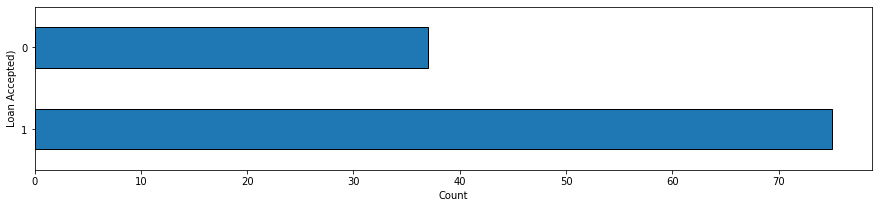

In [ ]:
# View the split of accepted vs. declined for women 
female['Loan_Status'].value_counts().plot(kind='barh', edgecolor="k", figsize=(15,3))
# Set the chart axis labels
plt.xlabel('Count')
plt.ylabel('Loan Accepted)');

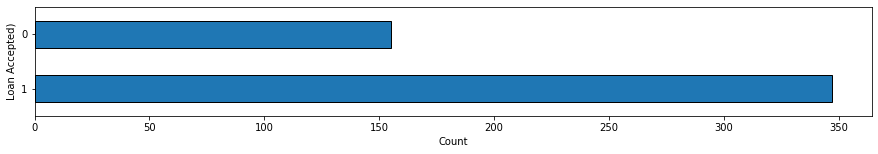

In [ ]:
# View the split of accepted vs. declined for men
male['Loan_Status'].value_counts().plot(kind='barh', edgecolor="k", figsize=(15,2))
plt.xlabel('Count')
plt.ylabel('Loan Accepted)');

In [ ]:
# Check the average income for all applicant types against the overall average to see which groups genereally earn more
print('The mean income for applicants is', loans['ApplicantIncome'].mean())
print('The median income for applicants is', loans['ApplicantIncome'].median())
print('')

# Compare acceptance for Self-Employed applicants 
print(format(len(selfemp[selfemp['Loan_Status'] == 'Y']) / len(selfemp), '.2%'), 'of self-employed applicants had their loans accepted')
print(' - The mean income for self-employed applicants is', selfemp['ApplicantIncome'].mean())
print(' - The median income for self-employed applicants is', selfemp['ApplicantIncome'].median())
print('')

# Compare acceptance for Employed applicants
print(format(len(emp[emp['Loan_Status'] == 'Y']) / len(emp), '.2%'), 'of employed applicants had their loans accepted')
print(' - The mean income for employed applicants is', emp['ApplicantIncome'].mean())
print(' - The median income for employed applicants is', emp['ApplicantIncome'].median())
print('')

# Compare acceptance for Graduate applicants
print(format(len(grads[grads['Loan_Status'] == 'Y']) / len(grads), '.2%'), 'of graduate applicants had their loans accepted')
print(' - The mean income for graduate applicants is', grads['ApplicantIncome'].mean())
print(' - The median income for graduate applicants is', grads['ApplicantIncome'].median())
print('')

# Compare acceptance for Married applicants
print(format(len(married[married['Loan_Status'] == 'Y']) / len(married), '.2%'), 'of married applicants had their loans accepted')
print(' - The mean income for married applicants is', married['ApplicantIncome'].mean())
print(' - The median income for married applicants is', married['ApplicantIncome'].median())

The mean income for applicants is 5403.459283387622
The median income for applicants is 3812.5

0.00% of self-employed applicants had their loans accepted
 - The mean income for self-employed applicants is 7380.817073170731
 - The median income for self-employed applicants is 5809.0

0.00% of employed applicants had their loans accepted
 - The mean income for employed applicants is 5098.678571428572
 - The median income for employed applicants is 3698.0

0.00% of graduate applicants had their loans accepted
 - The mean income for graduate applicants is 5857.433333333333
 - The median income for graduate applicants is 4000.0

0.00% of married applicants had their loans accepted
 - The mean income for married applicants is 5629.173366834171
 - The median income for married applicants is 3854.5


In [ ]:
# Create a dataframe with the ApplicantIncome and CoapplicantIncome for comparison
ApIncome = loans[['ApplicantIncome', 'CoapplicantIncome']]
ApIncome.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 27
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ApplicantIncome    614 non-null    int64
 1   CoapplicantIncome  614 non-null    int64
dtypes: int64(2)
memory usage: 14.4 KB


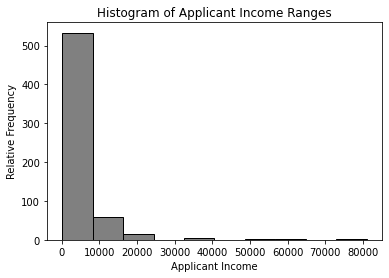

In [ ]:
# Create a histogram to understand how the distribution of the ApplicantIncome values 
# Apply the histogram chart type to the ApplicantIncome values and set the edge colour of the bars and the number of bins that the dat should be allocated to
plt.hist(ApIncome['ApplicantIncome'], edgecolor="k", color='gray')
# Set the chart title and axis labels
plt.title('Histogram of Applicant Income Ranges')
plt.xlabel('Applicant Income')
plt.ylabel('Relative Frequency');

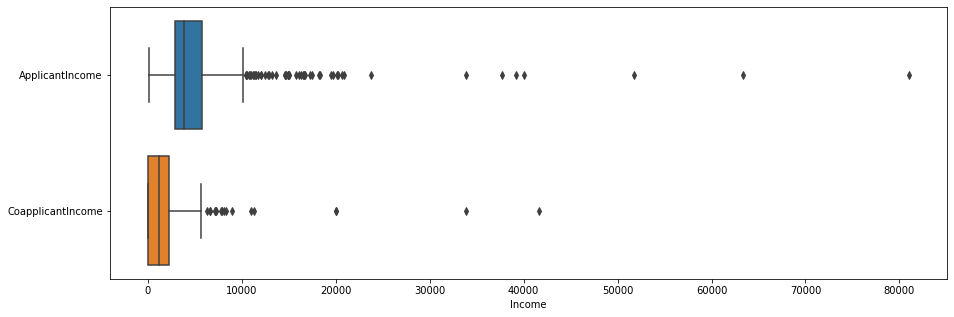

In [ ]:
# Here we will use the Seaborn wrapper to create a box plot of the income values for primary and co-applicants to find any outliers
# Create the plot canvas and set the size
plt.figure(figsize=(15,5))

# Create the box plot using the ApIncome data and use horizontal rotation 
sns.boxplot(data=ApIncome, orient='h')

# Set the chart axis labels
plt.xlabel('Income');

For reference, the below image shows Michael Galarnyk's explaination of how the boxplot works from the website
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

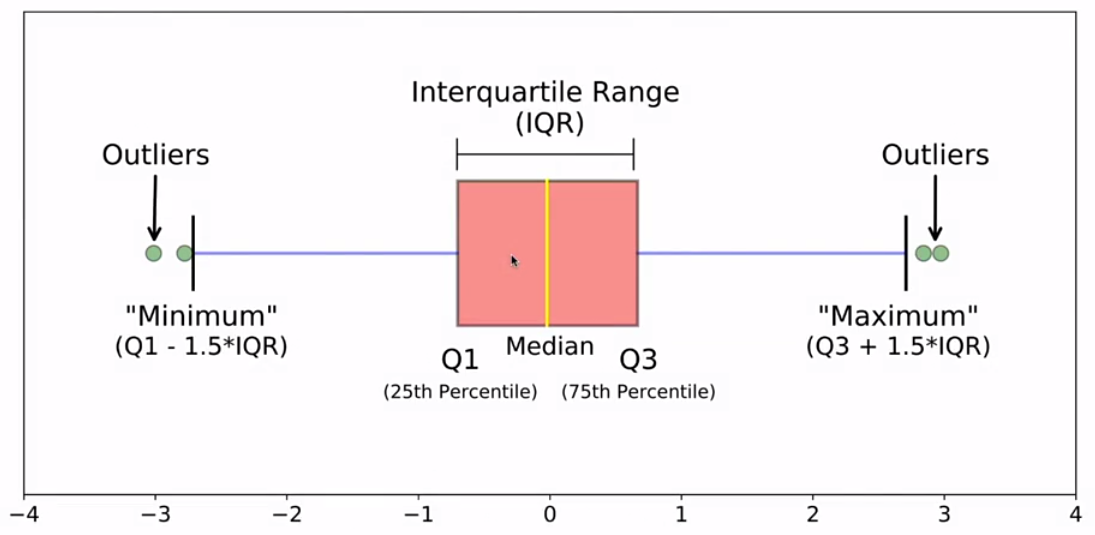

The box plot suggests the outliers are applicants with incomes over approximately 10,000.
Compare higher incomes outliers acceptance rate with the rate for all other applicants.

In [ ]:
# Check if the high income applicants are more or less likely to be accepted
# Create a high income data set containing all applicantincome values over 10000
highincome = loans[loans['ApplicantIncome'] > 10000]

# Create a regular income data set containing all applicantincome values of 10000 or less
regincome = loans[loans['ApplicantIncome'] <= 10000]

# Display the number and percentage of applicants that have incomes considered as outliers compared to the mean
print(len(highincome), 'applicants,', format(len(highincome) / len(loans), '.1%'),
      'of the total, have an income considered to be an outlier')

52 applicants, 8.5% of the total, have an income considered to be an outlier


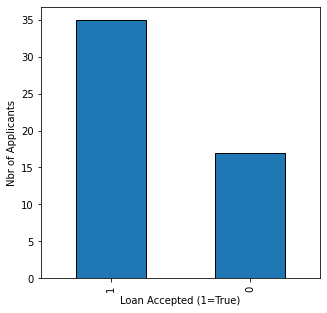

In [ ]:
# Plot the results for the applicants 
highincome['Loan_Status'].value_counts().plot(
    kind='bar', edgecolor="k", xlabel='Loan Accepted (1=True)', ylabel='Nbr of Applicants', figsize=(5,5));

In [ ]:
# Display percentage of high income applicants that are accepted
print('Percentage of high income applicants accepted:',
      format(len(highincome[highincome['Loan_Status'] == 'Y'])/len(highincome), '.2%'))

# Display percentage of regular income applicants that are accepted
print('Percentage of regular income applicants accepted:',
      format(len(regincome[regincome['Loan_Status'] == 'Y'])/len(regincome), '.2%'))

Percentage of high income applicants accepted: 0.00%
Percentage of regular income applicants accepted: 0.00%


While there are a number of applicants with incomes classed as outliers, there chance of being accepted is similar to that of the rest of the applicants, so if considering ApplicantIncome as a feature in the predicitive model, these outliers would not skew the results in any significant way.

## 3.5.2 Exploratory data analysis

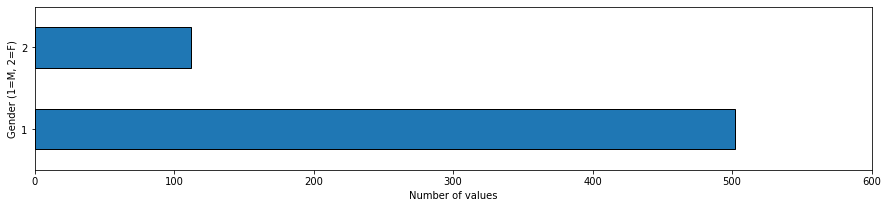

In [ ]:
# Plot Gender values bar chart, these should be 1 or 2 only, to see the split of applicants by Gender

# In the brackets's we pass in the plot type, the bar outline colour, the x axis label and the plot size (in inches, though this will vary depending on screen resolution/zoom settings)
loans['Gender'].value_counts().plot(kind='barh', edgecolor="k", figsize=(15,3), xlim=(0, 600))

# Add data label for each axis
plt.xlabel('Number of values')
plt.ylabel('Gender (1=M, 2=F)');

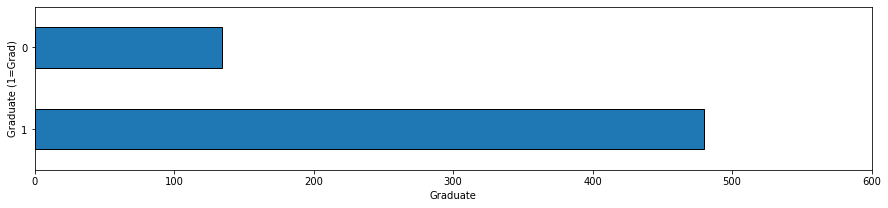

In [ ]:
# Plot Graduate values bar chart to compare acceptance, these should be 0 or 1 only
loans['Graduate'].value_counts().plot(kind='barh', edgecolor="k", figsize=(15,3), xlim=(0, 600))
plt.xlabel('Graduate')
plt.ylabel('Graduate (1=Grad)');

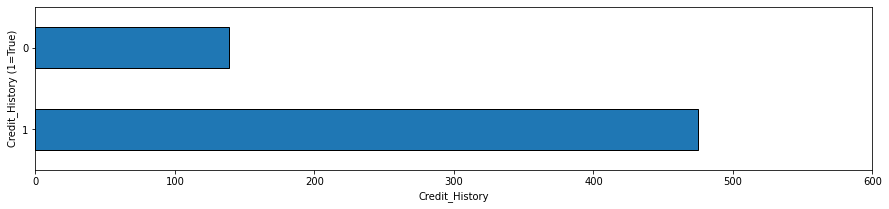

In [ ]:
# Plot Credit_History values bar chart to compare acceptance, these should be 0 or 1 only
loans['Credit_History'].value_counts().plot(kind='barh', edgecolor="k", figsize=(15,3), xlim=(0, 600))
plt.xlabel('Credit_History')
plt.ylabel('Credit_History (1=True)');

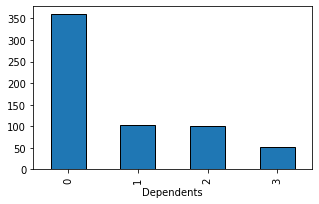

In [ ]:
# Plot Dependents values histogram, these should be integers of 0 or more
loans['Dependents'].value_counts().plot(kind='bar', edgecolor="k", figsize=(5,3))
plt.xlabel('Dependents');

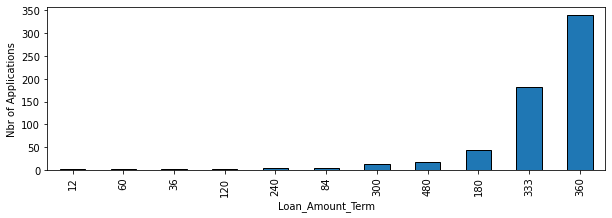

In [ ]:
# Check the loan term lengths for any odd looking values (Note: its not clear what unit of measurement is)

# Plot Loan_Amount_Term values histogram using sort_values() function to order the axis values from smallest to largest
loans['Loan_Amount_Term'].value_counts().sort_values(ascending=True).plot(kind='bar', edgecolor="k", figsize=(10,3))
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Nbr of Applications');

### Addressing Potential Gender Bias
The [UK Equality Act 2010](https://www.legislation.gov.uk/ukpga/2010/15/section/13) offers individuals protection from discrimination, whether generated by a human or automated decision-making system.
The GDPR Non-discrimination regulation (Article 21) complements this in it's inclusion of discrimination on the grounds sex.

In the ICO blog [Human bias and discrimination in AI systems](https://ico.org.uk/about-the-ico/news-and-events/ai-blog-human-bias-and-discrimination-in-ai-systems/) having 'imbalanced training data' and 'training data that reflects past discrimination' are highlighted as other ways in which discrimination problems can occur in machine learning models.

Given this is a legislative and ethical issue, 'Gender' must be removed as a feature of the predictive model to ensure there is at least no direct bias in our model.

In [ ]:
loans.isna().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Graduate             False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [ ]:
# Use the pandas.corr() method to see if there there is any correlation between Gender and Loan_Status
correlation = loans['Gender'].corr(loans['Loan_Status'])
print('There is a', round(correlation, 3), 'correlation between Gender and Loan_Status')

There is a  -0.018 correlation between Gender and Loan_Status


# 4 - Perform predictive modelling
1. Check the features in the data for correlation
2. Split the columns into X features and Y labels
3. Test, train, split
4. Classify using a Classification Algorithm
5. Create predictions for all test values

## 4.1 Analyse the data to check correlation betweeen features

In [ ]:
# Create a copy ofthe data to use in the modelling
loans2 = loans.copy()

# Remove Gender from the data set to avoid bias
loans2.drop(['Gender', 'Loan_ID'], axis=1, inplace=True)

In [ ]:
# Create and display the correlation matrix for values in the data to see which features corrolate positively and negatively
corr = loans2.corr()
corr

,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Married,1.000000,0.340684,-0.017671,0.008491,0.050194,0.080496,0.142151,-0.097980,-0.023626,-0.000395,0.084281
Dependents,0.340684,1.000000,-0.055752,0.056798,0.118202,0.030429,0.151151,-0.105331,-0.017523,0.000244,0.010118
Graduate,-0.017671,-0.055752,1.000000,0.010383,0.140760,0.062290,0.153454,0.082099,0.081637,-0.065243,0.085884
Self_Employed,0.008491,0.056798,0.010383,1.000000,0.127180,-0.016100,0.108948,-0.051704,-0.004994,0.030860,-0.003700
ApplicantIncome,0.050194,0.118202,0.140760,0.127180,1.000000,-0.116604,0.549594,-0.054802,0.006986,0.009500,-0.004710
CoapplicantIncome,0.080496,0.030429,0.062290,-0.016100,-0.116604,1.000000,0.178124,-0.061419,-0.058796,-0.010521,-0.059188
LoanAmount,0.142151,0.151151,0.153454,0.108948,0.549594,0.178124,1.000000,0.012635,-0.023796,0.041829,-0.058479
Loan_Amount_Term,-0.097980,-0.105331,0.082099,-0.051704,-0.054802,-0.061419,0.012635,1.000000,-0.004702,0.045732,-0.033615
Credit_History,-0.023626,-0.017523,0.081637,-0.004994,0.006986,-0.058796,-0.023796,-0.004702,1.000000,0.018761,0.432616
Property_Area,-0.000395,0.000244,-0.065243,0.030860,0.009500,-0.010521,0.041829,0.045732,0.018761,1.000000,-0.032112


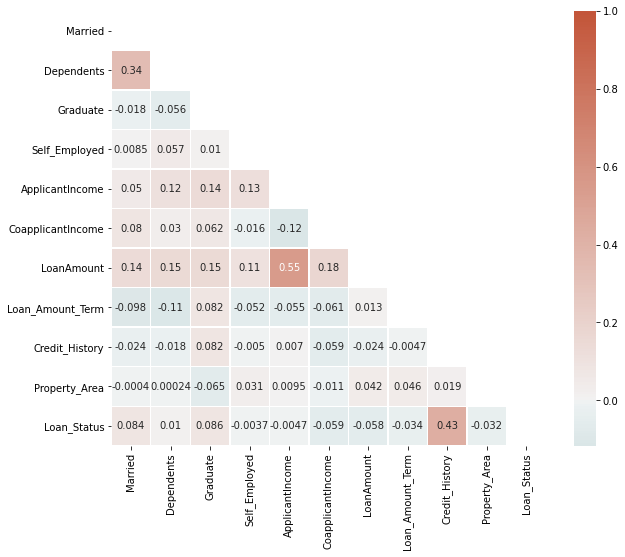

In [ ]:
# Display the correlation matrix chart.  Align the darker colour to the higher correlation values

# Set the masked sections of the chart to make it less confusing to read 
mask = np.triu(np.ones_like(corr, dtype=bool))
#Set the colour mapping to a diverging palette
cmap = sns.diverging_palette(200, 20, as_cmap=True)

# Plot the chart and the colour range as subplots, including the mask and cmap setting above
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, annot=True);

## 4.2 - Correlation findings
Correlation is a value between -1 and 1, where the closer to 1 the value is, the higher the positive correlation. Values closer to -1 are deemed negative correlation (e.g. the correlation between sales of meat and vegan products).

The above matrix shows that the highest correlation is between LoanAmount and ApplicantIncome, with Credit_History and Loan_Status also seeing good correlation.

As you might expect, Dependents is correlated closely to Dependents.  The LoanAmount is also positively correlated with the coapplicant's income and the main applicant's graduate status, number of dependents and marrital status.

Applicant and Coapplicant income, despite being 2 of the 4 highest correlating features, do not have positive correlation to the Loan_Status, which is what we are looking to predict

In [ ]:
# Drop the features that are not requested in the model.
loans2.drop(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1, inplace=True)

In [ ]:
# Create a new correlation data frame taking the loans2 data set with model features only
corr2 = loans2.corr()

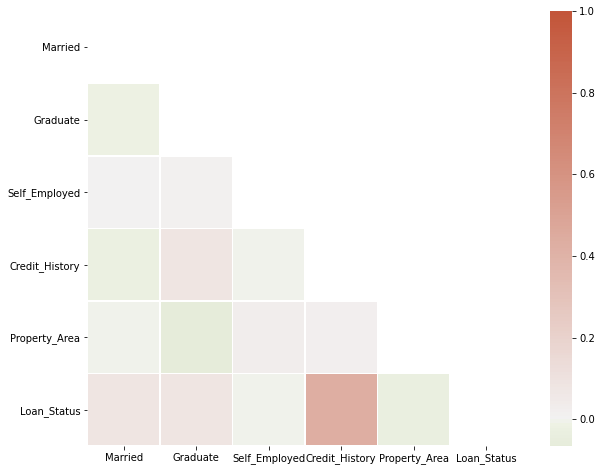

In [ ]:
# Create a new Correlation matric chart for the new loans2 data set 
# Set mask and colour map and display the chart
mask = np.triu(np.ones_like(corr2, dtype=bool))
cmap = sns.diverging_palette(100, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr2, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5);

## 4.3 Split the data for training and testing

In [ ]:
# For the predictive model we now need to split the data set of features (inputs) and outcomes (outputs)

# For data set X, we drop the Loan_Status column
X = loans2.drop('Loan_Status', axis=1)
# For the y data set we take only the Loan_Status column
y = loans2['Loan_Status']

In [ ]:
# Show the X data header
X.head()

,Married,Graduate,Self_Employed,Credit_History,Property_Area
0,0,1,0,1,1
1,1,1,0,1,3
2,1,1,1,1,1
3,1,0,0,1,1
4,0,1,0,1,1


In [ ]:
#Show the y data header
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

4.3 Split the data to training and testing sets
A random split based on a percentage of the overal data will be used

In [ ]:
# Using the SciKitLearn 'train_test_split', split the data in to subsets. One to train the model on, one to test it on.

# Import the model
from sklearn.model_selection import train_test_split

# Assign data randomly to the X and y training and testing data subsets using the train_test_split function
# Note the testing data set size is set to 0.2, this will take 20% of the X and y data sets create previously
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Check the training and test data sets 
print('Training record count:', len(X_train))
print('Testing record count:', len(X_test))
print('Total record count', len(X_train)+len(X_test))

Training record count: 491
Testing record count: 123
Total record count 614


## 4.4 Create the model
As the objective is to arrive at a prediction of approved/rejected, we will use binary classification DecisionTreeRegressor model.

"Decision Tree algorithms are effective [3] in that they provide human-readable rules of classification. Beside this
it has some drawbacks, one of which is the sorting of all numerical attributes when the tree decides to split a node. Such split on sorting all numerical attributes becomes costly i.e. efficiency or running time and memory size, especially if Decision Trees are set on data the size of
which is large i.e. it has more number of instances"

Reference Article: https://www.researchgate.net/profile/Nasir_Ahmad7/publication/259235118_Random_Forests_and_Decision_Trees/links/02e7e52a9a3a0a4ce6000000/Random-Forests-and-Decision-Trees.pdf


In [ ]:
# Import the DescisionTreeRegressor model
from sklearn.tree import DecisionTreeRegressor

# Assign the DiscisionTreeRegressor function to the object 'regressor'
regressor = DecisionTreeRegressor()
# Assign the data to the model parameters 
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# Assign the predictions from the model to a new object called 'y_pred'.
# The values rturned in y_pred are the predicted outcomes based on what the model learned from the training data set in the previus step.
y_pred = regressor.predict(X_test)

In [ ]:
# Create a new data fram showing the Actuals (from y_test) against the predictions (from y_pred)
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

In [ ]:
# Here's how the df data set looks, the prdictions being a confidence rating
# Anything over .5 would result in a positive, therefore 'accepted' status.
# Anything below would be classed as negative and therefore 'rejected'.
df.head(5)

,Actual,Predicted
510,1,0.893333
52,0,0.833333
592,0,0.500000
525,1,0.500000
55,1,0.893333


In [ ]:
# Convert the float values in to integers
df['Predicted'] = df['Predicted'].round(0).astype(int)

In [ ]:
df.head()

,Actual,Predicted
510,1,1
52,0,1
592,0,0
525,1,0
55,1,1


In [ ]:
# Group the data by The Actual and Predicted values and count the nymber of occurences
df.groupby(["Actual", "Predicted"]).size().reset_index(name="Count")

,Actual,Predicted,Count
0,0,0,21
1,0,1,19
2,1,0,7
3,1,1,76


## 4.5 Scoring the model
We'll check 3 metrics

* Mean Absolute Error (MAE): This measures the absolute average distance between the real data and the predicted data, but it fails to punish large errors in prediction.
* Mean Square Error (MSE): This measures the squared average distance between the real data and the predicted data.  Because it squares the errors, bigger errors are penalised more than smaller ones.
* Root Mean Squared Error (RMSE): This is actually the square root of MSE. Also, this metrics solves the problem of squaring the units.  The lower the value, the more accurate the model's predictions are.

When creating multiple models, scoring can be used to compare how well each perfomred. Note that the results are likely to change each time the model is trained, since we randomly assign values when we build it.

In [ ]:
# Import the metics library
from sklearn import metrics
# Calculate the metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.34675592472681727
Mean Squared Error: 0.17487860496448676
Root Mean Squared Error: 0.41818489327627173


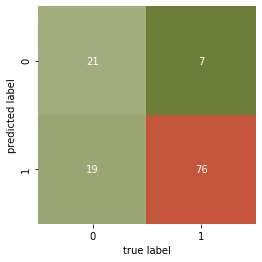

In [ ]:
# Create a confusion matrix using SciKit Learn's confusion_matrix
# Plot this using Seaborn's heatmap to see the predictions vs actuals 
from sklearn.metrics import confusion_matrix

# Create confusion matrix dataframe
mat = confusion_matrix(y_test, y_pred.round())

# Plot the dataframe using heatmap, passing in the data and rendering settings, then adding the axis labels
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap=cmap)
plt.xlabel('true label')
plt.ylabel('predicted label');

Calculate Decision Tree Accuracy

In [ ]:
# Create an accuracy score using the built in metrics function and assign to the object accSK
# Predictions are being rounded since they are currently stored as floating point values (decimals)
accSK = metrics.accuracy_score(y_test, y_pred.round())

# Display the value assigne to accSK (accuracy score)
print('DecisionTree Model Accuracy:', format(accSK, '.4%'))

DecisionTree Model Accuracy: 78.8618%
